In [27]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

In [29]:
g = nx.Graph()
g.add_edge('a', 'b')
g.add_edge('b', 'c')
g.add_edge('a', 'c')
g.add_edge('c', 'd')

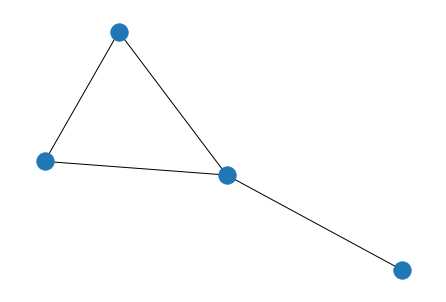

In [30]:
nx.draw(g)
plt.show()

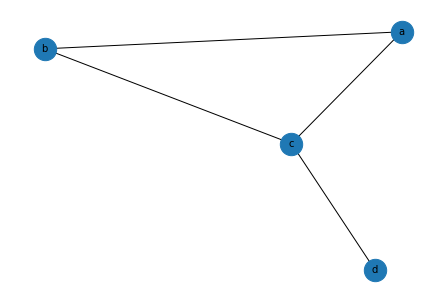

In [31]:
pos = nx.spring_layout(g)

nx.draw(g, pos, node_size = 500)
nx.draw_networkx_labels(g, pos, font_size = 10)
plt.show()

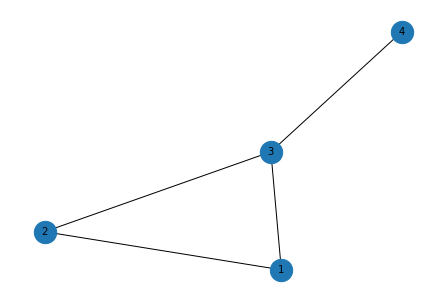

In [32]:
G = nx.Graph()

G.add_nodes_from([1, 2, 3, 4])
G.add_edges_from([(1,2), (1,3), (2,3), (3,4)])  

# plot a graph 
pos = nx.spring_layout(G)

nx.draw(G, pos, node_size = 500)
nx.draw_networkx_labels(G, pos, font_size = 10)
plt.show()

In [33]:
print(nx.number_of_nodes(G))
print(nx.number_of_edges(G))
print(G.nodes())
print(G.edges())

4
4
[1, 2, 3, 4]
[(1, 2), (1, 3), (2, 3), (3, 4)]


In [34]:
A = nx.adjacency_matrix(G)

print(A)
print(A.todense())

  (0, 1)	1
  (0, 2)	1
  (1, 0)	1
  (1, 2)	1
  (2, 0)	1
  (2, 1)	1
  (2, 3)	1
  (3, 2)	1
[[0 1 1 0]
 [1 0 1 0]
 [1 1 0 1]
 [0 0 1 0]]


In [35]:
import numpy as np

In [36]:
A = np.array([[0,1,1,1],
              [1,0,0,0],
              [1,0,0,1],
              [1,0,1,0]])

A_self = A + np.eye(4)

print(A_self)

[[1. 1. 1. 1.]
 [1. 1. 0. 0.]
 [1. 0. 1. 1.]
 [1. 0. 1. 1.]]


In [37]:
D = np.array(A_self.sum(1)).flatten()
D = np.diag(D)

print(D)

[[4. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 3. 0.]
 [0. 0. 0. 3.]]


In [38]:
A_norm = np.linalg.inv(D).dot(A_self)

print(A_norm)

[[0.25       0.25       0.25       0.25      ]
 [0.5        0.5        0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333]
 [0.33333333 0.         0.33333333 0.33333333]]


In [39]:
from scipy.linalg import fractional_matrix_power

D_half_norm = fractional_matrix_power(D, -0.5)

print(D_half_norm)

[[0.5        0.         0.         0.        ]
 [0.         0.70710678 0.         0.        ]
 [0.         0.         0.57735027 0.        ]
 [0.         0.         0.         0.57735027]]


In [40]:
A_self = np.asmatrix(A_self)
D_half_norm = np.asmatrix(D_half_norm)

A_half_norm = D_half_norm*A_self*D_half_norm

print(A_half_norm)

[[0.25       0.35355339 0.28867513 0.28867513]
 [0.35355339 0.5        0.         0.        ]
 [0.28867513 0.         0.33333333 0.33333333]
 [0.28867513 0.         0.33333333 0.33333333]]


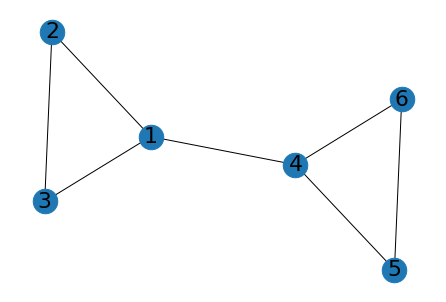

In [41]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

G = nx.Graph()

G.add_nodes_from([1, 2, 3, 4, 5, 6])
G.add_edges_from([(1, 2), (1, 3), (2, 3), (1, 4), (4, 5), (4, 6), (5, 6)])

nx.draw(G, with_labels = True, node_size = 600, font_size = 22)
plt.show()

In [42]:
A = nx.adjacency_matrix(G).todense()

print(A)

[[0 1 1 1 0 0]
 [1 0 1 0 0 0]
 [1 1 0 0 0 0]
 [1 0 0 0 1 1]
 [0 0 0 1 0 1]
 [0 0 0 1 1 0]]


In [43]:
H = np.matrix([1,0,0,-1,0,0]).T

print(H)

[[ 1]
 [ 0]
 [ 0]
 [-1]
 [ 0]
 [ 0]]


In [44]:
A*H

matrix([[-1],
        [ 1],
        [ 1],
        [ 1],
        [-1],
        [-1]])

In [45]:
A_self = A + np.eye(6)

A_self*H

matrix([[ 0.],
        [ 1.],
        [ 1.],
        [ 0.],
        [-1.],
        [-1.]])

In [46]:
D = np.array(A_self.sum(1)).flatten()
D = np.diag(D)

D_half_norm = fractional_matrix_power(D, -0.5)

A_self = np.asmatrix(A_self)
D_half_norm = np.asmatrix(D_half_norm)

A_half_norm = D_half_norm*A_self*D_half_norm

A_half_norm*H

matrix([[ 0.        ],
        [ 0.28867513],
        [ 0.28867513],
        [ 0.        ],
        [-0.28867513],
        [-0.28867513]])

In [47]:
np.random.seed(20)

W1 = np.random.randn(1, 4) # input: 1 -> hidden: 4
W2 = np.random.randn(4, 2) # hidden: 4 -> output: 2

def relu(x):
    return np.maximum(0, x)

def gcn(A_self, H, W):   
    D = np.diag(np.array(A_self.sum(1)).flatten())    
    D_half_norm = fractional_matrix_power(D, -0.5)
    H_new = D_half_norm*A_self*D_half_norm*H*W
    return relu(H_new)

H1 = H
H2 = gcn(A_self, H1, W1)
H3 = gcn(A_self, H2, W2)

print(H3)

[[0.         0.07472825]
 [0.         0.08628875]
 [0.         0.08628875]
 [0.12632564 0.        ]
 [0.14586829 0.        ]
 [0.14586829 0.        ]]


In [48]:
!pip install spektral==0.6.0
!pip install tensorflow==2.2.0
!pip install keras==2.3.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
import numpy as np
import networkx as nx
import tensorflow as tf
import matplotlib.pyplot as plt

# import spektral

In [51]:
nodes = np.load('./data_files/cora_nodes.npy')
edge_list = np.load('./data_files/cora_edges.npy')

labels_encoded = np.load('./data_files/cora_labels_encoded.npy')

H = np.load('./data_files/cora_features.npy')
data_mask = np.load('./data_files/cora_mask.npy')

N = H.shape[0]
F = H.shape[1]

print('H shape: ', H.shape)
print('The number of nodes (N): ', N)
print('The number of features (F) of each node: ', F)

num_classes = 7
print('The number of classes: ', num_classes)

FileNotFoundError: ignored

In [ ]:
# index of node for train model
train_mask = data_mask[0]

# index of node for test model
test_mask = data_mask[1]

In [ ]:
print("The number of trainig data: ", np.sum(train_mask))
print("The number of test data: ", np.sum(test_mask))

In [ ]:
G = nx.Graph(name = 'Cora')
G.add_nodes_from(nodes)
G.add_edges_from(edge_list)

print('Graph info: ', nx.info(G))

In [ ]:
from scipy.linalg import fractional_matrix_power

A = nx.adjacency_matrix(G)

I = np.eye(A.shape[-1])
A_self = A + I

D = np.diag(np.array(A_self.sum(1)).flatten())
D_half_norm = fractional_matrix_power(D, -0.5)
    
A_half_norm = D_half_norm * A_self * D_half_norm

A_half_norm = np.array(A_half_norm)
H = np.array(H)

In [ ]:
H_in = tf.keras.layers.Input(shape = (F, ))
A_in = tf.keras.layers.Input(shape = (N, ))

graph_conv_1 = spektral.layers.GraphConv(channels = 16,
                                         activation = 'relu')([H_in, A_in])

graph_conv_2 = spektral.layers.GraphConv(channels = 7,
                                         activation = 'softmax')([graph_conv_1, A_in])

model = tf.keras.models.Model(inputs = [H_in, A_in], outputs = graph_conv_2)

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-2),
              loss = 'categorical_crossentropy',
              weighted_metrics = ['acc'])

model.summary()

In [ ]:
model.fit([H, A_half_norm],
          labels_encoded,
          sample_weight = train_mask,
          epochs = 30,
          batch_size = N,
          shuffle = False)

In [ ]:
y_pred = model.evaluate([H, A_half_norm],
                        labels_encoded,
                        sample_weight = test_mask,
                        batch_size = N)

In [ ]:
from sklearn.manifold import TSNE

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
activations = activation_model.predict([H,A_half_norm],batch_size = N)

x_tsne = TSNE(n_components = 2).fit_transform(activations[2]) 

In [ ]:
def plot_tSNE(labels_encoded,x_tsne):
    color_map = np.argmax(labels_encoded, axis = 1)
    plt.figure(figsize = (10,10))
    for cl in range(num_classes):
        indices = np.where(color_map == cl)
        indices = indices[0]
        plt.scatter(x_tsne[indices,0], x_tsne[indices, 1], label = cl)
    plt.legend()
    plt.show()
    
plot_tSNE(labels_encoded,x_tsne)